In [67]:
import numpy as np
import pandas as pd 
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn 
import torch.optim as optim
from torchvision import transforms


In [68]:
torch.manual_seed(42)

In [69]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [70]:
df = pd.read_csv(r"C:\Users\acer\Desktop\pytorch\ANN\fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [71]:
df.shape

(6000, 785)

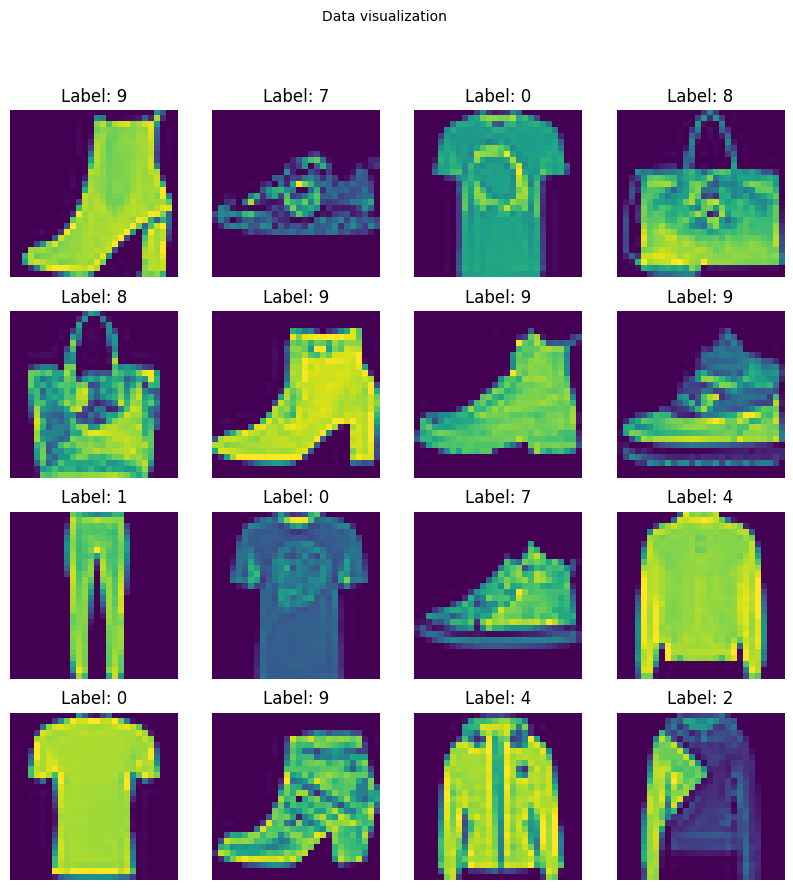

In [72]:
#data visualization 
fig,axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("Data visualization",fontsize=10)

for idx, ax in enumerate(axes.flat):
    img = df.iloc[idx,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {df.iloc[idx,0]}")


In [73]:
X = df.iloc[:,1:].values
y=df.iloc[:,0].values

In [74]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
#note : we dont do transformation here we will define custom transformations and apply it in CustomDataset class
#scaling
# X_train = X_train/255
# X_test = X_test/255

In [76]:
#transformations
from torchvision.transforms import transforms

custom_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

In [ ]:
from PIL import Image
import numpy as np
class CustomDataset(Dataset):
    def __init__(self,features,labels,transform):
        self.features = features
        #we need to change astype which cant be done for tensors so leave it as it is
        #for uniformity leave labels too or can change it 
        self.labels = labels
        self.transform = transform
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        # print("First Step:")
        # print(self.features[index])
        #resize to (28,28)
        image = self.features[index].reshape(28,28)
        #change datatype to np.uint8
        image = image.astype(np.uint8)
        # print("Reshaped and changed type")
        # print(image)
        #change b&w to color
        image = np.stack([image]*3,axis=-1)
        #need to add channel at last dimension so axis =-1

        # print("stacked:")
        # print(image.shape)
        # print(image)

        #convert array to PIL image
        image = Image.fromarray(image)
        # print("Converted to PIL image")
        #image.show()  # <- this will open the image

        #apply transforms to PIL image
        image = self.transform(image)
        # print(image.dtype)
        #to visualize each transform comment self.transform
        # resized = transforms.Resize(256)(image)
        # # print("Resized:",resized)
        # # print(resized.shape)
        # #It resizes the shorter side of the image (which is both 28 in a square image) to 256 pixels.
        # #To do that, it upsamples the image using interpolation (e.g., bilinear or bicubic).
        # #So your tiny image becomes larger in size, but the content just looks "zoomed-in" or blurred because there's no new real detail.
        # cropped = transforms.CenterCrop(224)(resized)
        # # print("Cropped",cropped)
        # # print(cropped.shape)
        # tensor = transforms.ToTensor()(cropped)

        # normalized = transforms.Normalize(
        #     mean=[0.485, 0.456, 0.406],
        #     std=[0.229, 0.224, 0.225]
        # )(tensor)
        #performs each channel with x-mean/std with mean and std of each channel
        #return
        return(image,torch.tensor(self.labels[index],dtype=torch.long)) #image is already in tensor with req type(float32)
    
    

In [179]:
train_dataset = CustomDataset(X_train, y_train, transform=custom_transform)
test_dataset = CustomDataset(X_test, y_test, transform=custom_transform)

UNDERSTANDING np.stack

In [109]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [114]:
c = np.stack([a,b])  #by default axis =0

In [120]:
np.stack([a,b],axis=0)
np.stack([a,b],axis=1)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
np.stack([a,b],axis=-1)
#axis= -1 means you’re adding a new dimension at the end of the shape
#The original arrays were shape (3,), and now you added a dimension at the end → (3, 2).

array([[1, 4],
       [2, 5],
       [3, 6]])

In [113]:
[a]*3

[array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3])]

practical usecase to convert grayscale image into rgb

In [115]:
c

array([[1, 2, 3],
       [4, 5, 6]])

In [177]:
#lets first change to 2 channels
np.stack([c]*2)  #ie changes shape from 2,3 to 2,2,3 (at axis 0)
np.stack([c]*2,axis=1)  #ie changes shape from 2,3 to 2,2,3 (at axis 1)
np.stack([c]*2,axis=2)  #ie changes shape from 2,3 to 2,3,2 (at axis 2)
# last one(-1) is same as:np.stack([c]*2,axis=-1).shape

array([[[1, 1],
        [2, 2],
        [3, 3]],

       [[4, 4],
        [5, 5],
        [6, 6]]])

In [140]:
#to make c(grayscale image) to rgb image
np.stack([c]*3).shape #ie changes shape from 2,3 to 3,2,3 (at axis 0)
np.stack([c]*3,axis=-1)  #ie changes shape from 2,3 to 3,3,2 (at axis 2)

array([[[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]],

       [[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]]])

In [180]:
train_dataloader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [181]:
#model 
#fetch the pretrained model from torchvision.models
import torchvision.models as models
vgg16 = models.vgg16(pretrained=True)


c:\Users\acer\Desktop\pytorch\env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\acer\Desktop\pytorch\env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\acer/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [00:53<00:00, 10.3MB/s] 


In [182]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [183]:
vgg16.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [184]:
vgg16.features.parameters()

<generator object Module.parameters at 0x0000021249C2C200>

In [188]:
# for i in vgg16.features.parameters():
#     print(i)

In [186]:
#freeze features weights
for param in vgg16.features.parameters():
    param.requires_grad = False


In [191]:
#replace classifier
vgg16.classifier = nn.Sequential(
    nn.Linear(7*7*512,1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024,512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512,10)
)

In [192]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [193]:
vgg16 = vgg16.to(device)

In [196]:
epochs = 10 #for fast execution
lr = 0.0001 #for fine tuning make lr small

In [197]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.classifier.parameters(),lr=lr)



In [198]:
for epoch in range(epochs):
    epoch_loss = 0
    for batch_features,batch_labels in train_dataloader:
        batch_features,batch_labels = batch_features.to(device), batch_labels.to(device)
        y_pred = vgg16(batch_features)
        loss = criterion(y_pred,batch_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss
    print(f"Epoch: {epoch}, loss: {epoch_loss/len(train_dataloader)}")

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [200]:
vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
correct =0 
with torch.no_grad(): 
    for batch_features,batch_labels in test_dataloader:
        batch_features,batch_labels = batch_features.to(device),batch_labels.to(device)
        y_red = model(batch_features)
        _,y_pred = torch.max(y_pred,1)
        correct += (y_pred == batch_labels).sum().item()

    acc = correct/len(test_dataset)
    print("Accuracy",acc)

Accuracy 0.8433333333333334


In [ ]:
correct =0 
with torch.no_grad(): 
    for batch_features,batch_labels in train_dataloader:
        batch_features,batch_labels = batch_features.to(device),batch_labels.to(device)
        y_pred = vgg16(batch_features)
        _,y_pred = torch.max(y_pred,1)
        correct += (y_pred == batch_labels).sum().item()

    acc = correct/len(train_dataset)
    print("Accuracy",acc)

Accuracy 0.9839583333333334
